### Code Description Is Written In Comments In Each Cell

In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
#Importing excel file into dataframe
data = pd.read_excel('MyStudentsDBTest.xlsx')

In [3]:
#Shape of data (row,columns)
data.shape

(180, 12)

In [4]:
#Printing first 5 rows of data
data.head()

,StuDentID,Gender,Age,IsWorking,CourseID,TopicID,Grade,Nationality,TopicLanguage,StudentNativeLanguage,IsPresent,Proffesor's mean score
0,1,M,19,No,1,NaN,100,HY,HY,HY,1,98
1,1,M,19,No,2,NaN,100,HY,HY,HY,1,100
2,1,M,19,No,3,NaN,100,HY,HY,HY,1,95
3,2,F,19,FullTime,1,NaN,81,HY,HY,HY,0,98
4,2,F,19,FullTime,2,NaN,75,HY,HY,HY,1,100


In [5]:
#Deleting TopicID because of 100% Null Values
del data['TopicID']

In [6]:
#Converting Object/Str/Cattegorical datatypes into 0's and 1's
label_enc = LabelEncoder()
data.Gender = label_enc.fit_transform(data.Gender)
data.IsWorking = label_enc.fit_transform(data.IsWorking)
data.Nationality = label_enc.fit_transform(data.Nationality)
data.TopicLanguage = label_enc.fit_transform(data.TopicLanguage)
data.StudentNativeLanguage = label_enc.fit_transform(data.StudentNativeLanguage)
data.head()

,StuDentID,Gender,Age,IsWorking,CourseID,Grade,Nationality,TopicLanguage,StudentNativeLanguage,IsPresent,Proffesor's mean score
0,1,1,19,2,1,100,1,1,1,1,98
1,1,1,19,2,2,100,1,1,1,1,100
2,1,1,19,2,3,100,1,1,1,1,95
3,2,0,19,1,1,81,1,1,1,0,98
4,2,0,19,1,2,75,1,1,1,1,100


In [7]:
#One-Hot Encoding for the data
dfDummies = pd.get_dummies(data['Nationality'], prefix = 'Nationality')
dfDummies1 = pd.get_dummies(data["Proffesor's mean score"], prefix = "Proffesor's mean score")
dfDummies2 = pd.get_dummies(data['IsPresent'], prefix = 'IsPresent')
dfDummies3 = pd.get_dummies(data['StudentNativeLanguage'], prefix = 'StudentNativeLanguage')
dfDummies4 = pd.get_dummies(data['CourseID'], prefix = 'CourseID')
dfDummies5 = pd.get_dummies(data['IsWorking'], prefix = 'IsWorking')
dfDummies6 = pd.get_dummies(data['Age'], prefix = 'Age')
dfDummies7 = pd.get_dummies(data['Gender'], prefix = 'Gender')
dfDummies8 = pd.get_dummies(data['Grade'], prefix = 'Grade')
dfDummies9 = pd.get_dummies(data['TopicLanguage'], prefix = 'TopicLanguage')

In [8]:
#Concatinating all into 1 dataframe
main = pd.concat([data,dfDummies,dfDummies1,dfDummies2,dfDummies3,dfDummies4,dfDummies5,dfDummies6,dfDummies7,dfDummies8,dfDummies9], axis=1)

In [9]:
#Shape of data (rows,columns)
data.shape

(180, 11)

In [10]:
#Shape of data (rows,columns)
main.shape

(180, 57)

In [11]:
#all column names of original data into list for deleting it afterwards
lst = list(data.columns)

In [12]:
#Deleting extra coluns from the encoded dataframe
for i in range(1,len(lst)):
    del main[lst[i]]

In [13]:
#Shape of data (rows,columns)
main.shape

(180, 47)

In [14]:
#Display first 5 rows of data
main.head()

,StuDentID,Nationality_0,Nationality_1,Nationality_2,Proffesor's mean score_95,Proffesor's mean score_98,Proffesor's mean score_100,IsPresent_0,IsPresent_1,StudentNativeLanguage_0,...,Grade_80,Grade_81,Grade_85,Grade_90,Grade_95,Grade_98,Grade_100,TopicLanguage_0,TopicLanguage_1,TopicLanguage_2
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,2,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
del main['StuDentID']

In [17]:
#Applying Apriori
aprioriItems = apriori(main, min_support=0.07, use_colnames=True)

In [18]:
#Applying Association Rules
rules = association_rules(aprioriItems, metric="confidence", min_threshold=0.6)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Proffesor's mean score_95),(Nationality_1),0.333333,0.900000,0.300000,0.900000,1.000000,0.000000,1.000000
1,(Proffesor's mean score_98),(Nationality_1),0.333333,0.900000,0.300000,0.900000,1.000000,0.000000,1.000000
2,(Proffesor's mean score_100),(Nationality_1),0.333333,0.900000,0.300000,0.900000,1.000000,0.000000,1.000000
3,(IsPresent_0),(Nationality_1),0.366667,0.900000,0.333333,0.909091,1.010101,0.003333,1.100000
4,(Nationality_1),(IsPresent_1),0.900000,0.633333,0.566667,0.629630,0.994152,-0.003333,0.990000
5,(IsPresent_1),(Nationality_1),0.633333,0.900000,0.566667,0.894737,0.994152,-0.003333,0.950000
6,(StudentNativeLanguage_1),(Nationality_1),0.600000,0.900000,0.550000,0.916667,1.018519,0.010000,1.200000
7,(Nationality_1),(StudentNativeLanguage_1),0.900000,0.600000,0.550000,0.611111,1.018519,0.010000,1.028571
8,(StudentNativeLanguage_2),(Nationality_1),0.350000,0.900000,0.350000,1.000000,1.111111,0.035000,inf
9,(CourseID_1),(Nationality_1),0.333333,0.900000,0.300000,0.900000,1.000000,0.000000,1.000000


In [19]:
#Specifying some rules
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4175,"(StudentNativeLanguage_1, IsWorking_1)","(Age_19, Gender_0)",0.150000,0.150000,0.150000,1.000000,6.666667,0.127500,inf
4177,"(Age_19, Gender_0)","(StudentNativeLanguage_1, IsWorking_1)",0.150000,0.150000,0.150000,1.000000,6.666667,0.127500,inf
4307,"(Grade_71, Age_19)","(IsWorking_1, StudentNativeLanguage_2)",0.083333,0.150000,0.083333,1.000000,6.666667,0.070833,inf
4316,"(Grade_71, StudentNativeLanguage_2)","(IsWorking_1, Gender_1)",0.083333,0.150000,0.083333,1.000000,6.666667,0.070833,inf
4532,"(Grade_71, Age_19)","(IsWorking_1, Gender_1)",0.083333,0.150000,0.083333,1.000000,6.666667,0.070833,inf
...,...,...,...,...,...,...,...,...,...
27184,"(Proffesor's mean score_98, Gender_1, Grade_81)","(CourseID_1, TopicLanguage_1, Nationality_1, S...",0.100000,0.116667,0.083333,0.833333,7.142857,0.071667,5.3
27190,"(Nationality_1, Proffesor's mean score_98, Gra...","(CourseID_1, TopicLanguage_1, Gender_1, Studen...",0.100000,0.116667,0.083333,0.833333,7.142857,0.071667,5.3
27191,"(StudentNativeLanguage_2, Proffesor's mean sco...","(CourseID_1, TopicLanguage_1, Gender_1, Nation...",0.083333,0.161111,0.083333,1.000000,6.206897,0.069907,inf
27194,"(Age_19, Proffesor's mean score_98, Grade_81)","(CourseID_1, TopicLanguage_1, Gender_1, Nation...",0.100000,0.116667,0.083333,0.833333,7.142857,0.071667,5.3


In [20]:
#Copying 3 columns for KMeans
new = rules[['support', 'confidence', 'lift']].copy()

In [21]:
#New Dataframe with 3 columns
new

,support,confidence,lift
0,0.300000,0.900000,1.000000
1,0.300000,0.900000,1.000000
2,0.300000,0.900000,1.000000
3,0.333333,0.909091,1.010101
4,0.566667,0.629630,0.994152
...,...,...,...
27206,0.083333,0.714286,6.122449
27207,0.083333,0.600000,5.142857
27208,0.083333,0.681818,4.231975
27209,0.083333,0.600000,5.142857


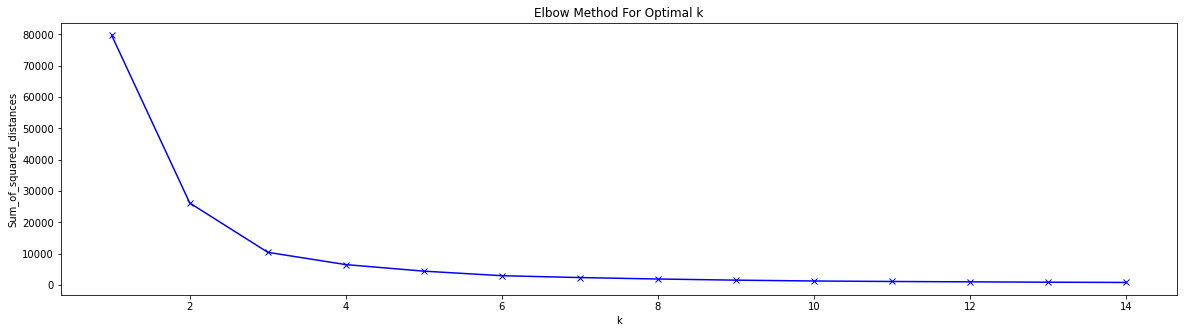

In [22]:
#Applying KMeans to find optimal K value (Using Elbow Method)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
#KMeans
model = KMeans(n_clusters=3)
model.fit(new)
kmeans_labels = model.labels_

In [31]:
DS2_clustered_kmeans = rules.assign(Cluster=kmeans_labels)

In [32]:
DS2_clustered_kmeans

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Cluster
0,(Proffesor's mean score_95),(Nationality_1),0.333333,0.900000,0.300000,0.900000,1.000000,0.000000,1.000000,0
1,(Proffesor's mean score_98),(Nationality_1),0.333333,0.900000,0.300000,0.900000,1.000000,0.000000,1.000000,0
2,(Proffesor's mean score_100),(Nationality_1),0.333333,0.900000,0.300000,0.900000,1.000000,0.000000,1.000000,0
3,(IsPresent_0),(Nationality_1),0.366667,0.900000,0.333333,0.909091,1.010101,0.003333,1.100000,0
4,(Nationality_1),(IsPresent_1),0.900000,0.633333,0.566667,0.629630,0.994152,-0.003333,0.990000,0
...,...,...,...,...,...,...,...,...,...,...
27206,"(Proffesor's mean score_98, Grade_81)","(CourseID_1, TopicLanguage_1, Gender_1, Nation...",0.116667,0.116667,0.083333,0.714286,6.122449,0.069722,3.091667,1
27207,"(Nationality_1, Grade_81)","(CourseID_1, IsPresent_1, TopicLanguage_1, Gen...",0.138889,0.116667,0.083333,0.600000,5.142857,0.067130,2.208333,1
27208,"(StudentNativeLanguage_2, Grade_81)","(CourseID_1, IsPresent_1, TopicLanguage_1, Gen...",0.122222,0.161111,0.083333,0.681818,4.231975,0.063642,2.636508,2
27209,"(Age_19, Grade_81)","(CourseID_1, IsPresent_1, TopicLanguage_1, Gen...",0.138889,0.116667,0.083333,0.600000,5.142857,0.067130,2.208333,1


In [33]:
DS2_clustered_kmeans.to_csv('finaldata.csv')

K-Means


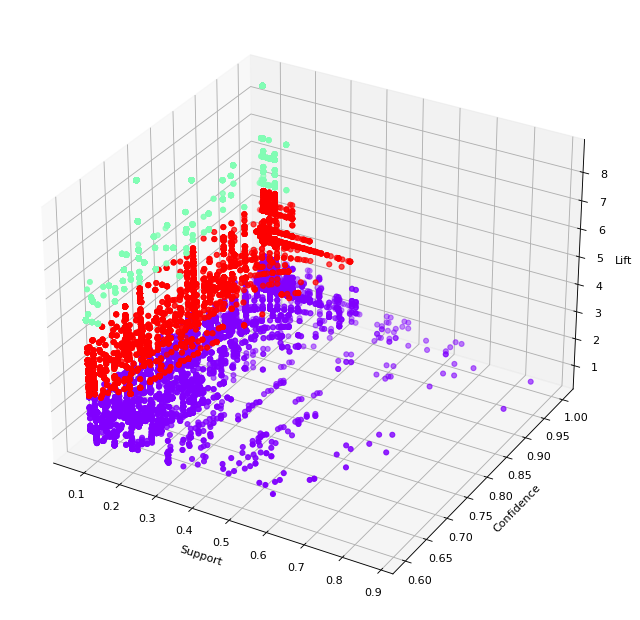

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rules['support'],rules['confidence'],rules['lift'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Support', linespacing=3.2)
yLabel = ax.set_ylabel('Confidence', linespacing=3.1)
zLabel = ax.set_zlabel('Lift', linespacing=3.4)
print("K-Means")